In [1]:
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt

In [3]:
mark_df=pd.read_csv('DS1_C4_S7_Students_Scores_Data_Practice.csv')
mark_df

,Statistics,Python,Tableau
0,61,86,66
1,54,86,72
2,56,80,78
3,54,85,45
4,53,84,68
...,...,...,...
95,60,76,64
96,59,89,70
97,62,80,46
98,58,89,74


In [5]:
#task1 Calculate central tendencies
Mean=[]
Median=[]
Mode=[]
for col in mark_df:
    Mean.append(mark_df.loc[:,col].mean())
    Median.append(mark_df.loc[:,col].median())
    Mode.append(st.mode(mark_df[col]))

In [7]:
row_head=['Mean','Median','Mode']
col_name=['Statistics','Python','Tableau']
c_data=pd.DataFrame([Mean,Median,Mode],columns=col_name)
c_data.insert(0,'Measures',row_head,True)
c_data

,Measures,Statistics,Python,Tableau
0,Mean,60.89,81.84,68.02
1,Median,60.00,82.00,69.00
2,Mode,55.00,86.00,65.00


In [9]:
#task2: Measure of dispersion calculation
Mean=[]
SD=[]
CV=[]
var=[]
for col in mark_df:
    col_mean=mark_df.loc[:,col].mean()
    Mean.append(col_mean)
    col_sd=mark_df.loc[:,col].std()
    SD.append(col_sd)
    CV.append(col_sd/col_mean * 100)
    var.append(st.variance(mark_df[col]))

row_head=['Mean','Std deviation','Variance','Co-Variation']
col_name=['Statistics','Python','Tableau']
d_data=pd.DataFrame([Mean,SD,var,CV],columns=col_name)
d_data.insert(0,'Dispersion',row_head,True)
d_data

,Dispersion,Statistics,Python,Tableau
0,Mean,60.890000,81.840000,68.020000
1,Std deviation,7.236126,4.345484,7.320899
2,Variance,52.361515,18.883232,53.595556
3,Co-Variation,11.883931,5.309731,10.762862


In [42]:
#task3: identify outliers
for sub in mark_df:
    UO=[]
    LO=[]
    col_series=pd.Series(mark_df[sub])
    Min=min(col_series)
    Max=max(col_series)
    Range=Max-Min
    Q3=col_series.quantile(0.75)
    Q1=col_series.quantile(0.25)
    IQR=Q3-Q1
    UF=Q3+1.5*IQR
    LF=Q1-1.5*IQR
    for elt in mark_df[sub]:
        if elt>UF:
            UO.append(elt)
        elif elt<LF:
            LO.append(elt)

    if(sub=='Statistics'):
        stat=['Statistics',Min,Max,Range,IQR,Q1,Q3,UF,LF,[UO,LO]]
    elif(sub=='Python'):
        pyt=['Python',Min,Max,Range,IQR,Q1,Q3,UF,LF,[UO,LO]]
    elif(sub=='Tableau'):
        tabl=['Tableau',Min,Max,Range,IQR,Q1,Q3,UF,LF,[UO,LO]]
    
col_name=['Subjects','Min','Max','Range','IQR','Q1','Q3','u-fence','l-fence','outliers']
row_head=['Statistics','Python','Tableau']
data=pd.DataFrame([stat,pyt,tabl],columns=col_name)
data

,Subjects,Min,Max,Range,IQR,Q1,Q3,u-fence,l-fence,outliers
0,Statistics,50,74,24,13.00,54.0,67.00,86.500,34.500,"[[], []]"
1,Python,75,89,14,8.00,78.0,86.00,98.000,66.000,"[[], []]"
2,Tableau,45,79,34,9.25,64.0,73.25,87.125,50.125,"[[], [45, 50, 50, 50, 46, 46]]"


In [13]:
stt=mark_df['Statistics'].tolist()
py=mark_df['Python'].tolist()
tb=mark_df['Tableau'].tolist()

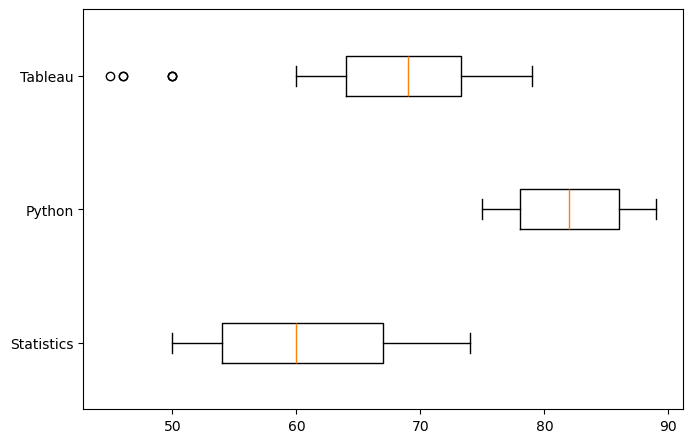

In [15]:
#task4: visual representation for distribution of scores using box plot 
fig=plt.figure(figsize=(6,4))
ax=fig.add_axes([0,0,1,1])
plt.boxplot([stt,py,tb],vert=0)
ax.set_yticklabels(['Statistics','Python','Tableau'])
plt.show()

In [ ]:
#task 5: kurtosis analysis for each subject

In [17]:
from scipy.stats import norm
from scipy.stats import kurtosis

Text(0.5, 1.0, 'Distribution of scores')

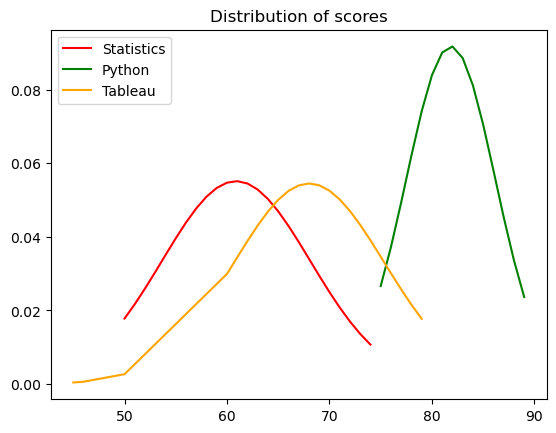

In [21]:
stt=sorted(stt)
py=sorted(py)
tb=sorted(tb)
s_mean=st.mean(stt)
s_sd=st.stdev(stt)
p_mean=st.mean(py)
p_sd=st.stdev(py)
t_mean=st.mean(tb)
t_sd=st.stdev(tb)
plt.plot(stt,norm.pdf(stt,s_mean,s_sd),color='red',label='Statistics')
plt.plot(py,norm.pdf(py,p_mean,p_sd),color='green',label='Python')
plt.plot(tb,norm.pdf(tb,t_mean,t_sd),color='orange',label='Tableau')
plt.legend()
plt.title('Distribution of scores')

In [27]:
print('The kurtosis for scores in Statistics is',kurtosis(stt))
print('The kurtosis for scores in Python is',kurtosis(py))
print('The kurtosis for scores in Tableau is',kurtosis(tb))

The kurtosis for scores in Statistics is -1.2890343729055107
The kurtosis for scores in Python is -1.2748529079288784
The kurtosis for scores in Tableau is 1.442459054422362
